Lee, Jong Yol   BFA-Cinema 1  
Group1 CS 5101  Natural Language Processing  

### Collecting Wiki Documents of Filipino and Korean Cuisine

In [1]:
import wikipediaapi

wiki_corpus = wikipediaapi.Wikipedia(
    user_agent='Corpus(Cuisine)', 
    language='en',
    extract_format=wikipediaapi.ExtractFormat.WIKI
    )

In [2]:
# https://en.wikipedia.org/wiki/Filipino_cuisine
pages = [#'Filipino_cuisine', 
        'Bulalo', 'Pancit', 'Pinakbet', 'Puto_(food)', 'Tinola',
         #'Korean_cuisine',
        'Galbi-tang', 'Naengmyeon', 'kimchi', 'Tteokbokki', 'Samgye-tang']
cuisine_docs = []
total_len = 0
for p in pages:
    p_wiki = wiki_corpus.page(p)
    if p_wiki.exists():
        print(f"{p} - Exists. len:{len(p_wiki.text)}")
        cuisine_docs.append(p_wiki.text)
        total_len += len(p_wiki.text)

print(total_len)

Bulalo - Exists. len:878
Pancit - Exists. len:11403
Pinakbet - Exists. len:4654
Puto_(food) - Exists. len:7614
Tinola - Exists. len:1532
Galbi-tang - Exists. len:1997
Naengmyeon - Exists. len:4930
kimchi - Exists. len:32268
Tteokbokki - Exists. len:9164
Samgye-tang - Exists. len:3392
77832


### Vectorization Using gensim

In [3]:
from gensim import corpora
import spacy
nlp = spacy.load('en_core_web_sm') # sm, md, lg, trf

In [4]:
cuisine_texts = []
for document in cuisine_docs:
    text = []
    doc = nlp(document)
    for w in doc:
        if not w.is_stop and not w.is_punct and not w.like_num:
            text.append(w.lemma_)
    cuisine_texts.append(text)
#texts is a mini-corpus specifically for toxic algal bloom

print(len(cuisine_texts), [len(t) for t in cuisine_texts])
for text in cuisine_texts:
    print(text[:2], ", ..., ", text[-2:])

10 [96, 1220, 470, 765, 163, 201, 508, 3111, 1002, 351]
['Bulalô', 'Tagalog'] , ...,  ['=', '=']
['Pancit', 'Tagalog'] , ...,  ['report', 'Pancit']
['Pinakbet', 'call'] , ...,  ['original', 'pinakbet']
['puto', 'Filipino'] , ...,  ['=', '=']
['Tinola', 'Filipino'] , ...,  ['=', '=']
['Galbi', 'tang'] , ...,  ['Konglish', 'Kitchen']
['Naengmyeon', '냉면'] , ...,  ['City', 'Tourism']
['Kimchi', 'Korean'] , ...,  ['KJFC/2023.38.4.203', 'ISSN']
['tteokbokki', 'korean'] , ...,  ['website', 'BaeDDuck']
['Samgye', 'tang'] , ...,  ['Korean', 'idomin.com']


### creating a BOW representation of the mini-corpus

In [5]:
import itertools
cuisine_dictionary = corpora.Dictionary(cuisine_texts)
print(len(cuisine_dictionary.token2id), 
      dict(itertools.islice(cuisine_dictionary.token2id.items(), 10))
)

2547 {'\n': 0, '\n\n': 1, '\n\n\n': 2, '\n ': 3, '=': 4, 'Batangas': 5, 'Bulalo': 6, 'Bulalô': 7, 'Cansi': 8, 'Cavite': 9}


### Using the doc2bow method, which, as the name suggests, helps convert our document to bag-of-words.

In [6]:
cuisine_corpus = [cuisine_dictionary.doc2bow(text) for text in cuisine_texts]
[c[:5] for c in cuisine_corpus]

[[(0, 4), (1, 2), (2, 1), (3, 1), (4, 4)],
 [(0, 53), (1, 7), (5, 2), (9, 4), (13, 2)],
 [(0, 18), (1, 8), (15, 1), (16, 1), (18, 1)],
 [(0, 26), (1, 5), (2, 1), (4, 4), (5, 1)],
 [(0, 9), (1, 4), (2, 1), (4, 4), (14, 1)],
 [(0, 9), (1, 4), (16, 1), (23, 5), (24, 2)],
 [(0, 17), (1, 7), (16, 1), (21, 7), (23, 4)],
 [(0, 87), (1, 38), (17, 1), (21, 7), (27, 23)],
 [(0, 35), (1, 11), (16, 1), (21, 7), (23, 1)],
 [(0, 12), (1, 4), (16, 1), (25, 2), (39, 10)]]

In [7]:
corpora.MmCorpus.serialize('cuisine_corpus.mm', cuisine_corpus)

### Converting Bag-of-Words to TF-IDF representation

In [8]:
from gensim import models
tfidf = models.TfidfModel(cuisine_corpus)

for document_tfidf in tfidf[cuisine_corpus]:
       print(len(document_tfidf), document_tfidf[:5])


76 [(2, 0.08092150591507617), (3, 0.15476151334415153), (4, 0.3236860236603047), (5, 0.08092150591507617), (6, 0.30952302668830306)]
547 [(5, 0.0156341433290542), (9, 0.0417985903199798), (13, 0.0208992951599899), (15, 0.02379691730865106), (16, 0.0006840774962270598)]
271 [(15, 0.01921876346961596), (16, 0.0022098868394345352), (18, 0.01921876346961596), (21, 0.032762311003565116), (24, 0.025252758480774767)]
354 [(2, 0.011451948884826016), (4, 0.045807795539304065), (5, 0.011451948884826016), (10, 0.015308652022929551), (15, 0.017431148921901937)]
110 [(2, 0.05830270895077813), (4, 0.23321083580311253), (14, 0.07793746656555761), (16, 0.005102111490584126), (21, 0.010805786874728609)]
126 [(16, 0.0038145125125688575), (23, 0.09247063387219771), (24, 0.08717818621558268), (31, 0.05826870736966202), (38, 0.012913196448208795)]
281 [(16, 0.0013713674188757332), (21, 0.020330980336015568), (23, 0.02659552728214145), (25, 0.07978658184642436), (35, 0.004642463964730725)]
1297 [(17, 0.0047

In [9]:
type(tfidf), type(tfidf[cuisine_corpus])

(gensim.models.tfidfmodel.TfidfModel, gensim.interfaces.TransformedCorpus)

### How to calculate TF-IDF similarity matrix of a complete corpus with Gensim  
Reference: https://gist.github.com/clemsos/7692685

In [10]:
from gensim import similarities
index = similarities.MatrixSimilarity(tfidf[cuisine_corpus])

In [11]:
sims = index[tfidf[cuisine_corpus]]
sims.shape, sims

((10, 10),
 array([[0.9999999 , 0.03490649, 0.02911836, 0.03414369, 0.12218719,
         0.03126611, 0.00932954, 0.0127186 , 0.00721465, 0.00178284],
        [0.03490649, 1.0000019 , 0.04759207, 0.04692567, 0.04254952,
         0.01025294, 0.08490998, 0.01839329, 0.03373532, 0.016691  ],
        [0.02911836, 0.04759207, 1.0000001 , 0.03179437, 0.06614574,
         0.03791166, 0.01636854, 0.04246736, 0.01399541, 0.00703744],
        [0.03414369, 0.04692567, 0.03179437, 1.0000007 , 0.0364877 ,
         0.00431951, 0.0103019 , 0.01344909, 0.01596   , 0.00885502],
        [0.12218719, 0.04254952, 0.06614574, 0.0364877 , 1.0000002 ,
         0.00992226, 0.01260246, 0.01377395, 0.00670267, 0.04566528],
        [0.03126611, 0.01025294, 0.03791166, 0.00431951, 0.00992226,
         1.        , 0.02815724, 0.04500473, 0.05018135, 0.10248172],
        [0.00932954, 0.08490998, 0.01636854, 0.0103019 , 0.01260246,
         0.02815724, 1.000001  , 0.06721284, 0.02256277, 0.02987547],
        [0.01271

This matrix is symmetric, with elements mirrored across the main diagonal.  
The main diagonal values are Self-Compared Values.

### To create a heatmap of cuisine similarities

In [12]:
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl


### To get the lower triangle of a matrix as percentage values
Removing Duplicate Values  
Removing Self-Compared Values  
Tranform to percentage values

In [13]:
sims_heatmap = np.round(np.tril(sims, k=-1)*100, 1)
sims_heatmap

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 3.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 2.9,  4.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 3.4,  4.7,  3.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [12.2,  4.3,  6.6,  3.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 3.1,  1. ,  3.8,  0.4,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9,  8.5,  1.6,  1. ,  1.3,  2.8,  0. ,  0. ,  0. ,  0. ],
       [ 1.3,  1.8,  4.2,  1.3,  1.4,  4.5,  6.7,  0. ,  0. ,  0. ],
       [ 0.7,  3.4,  1.4,  1.6,  0.7,  5. ,  2.3,  1.6,  0. ,  0. ],
       [ 0.2,  1.7,  0.7,  0.9,  4.6, 10.2,  3. ,  3.1,  1.2,  0. ]],
      dtype=float32)

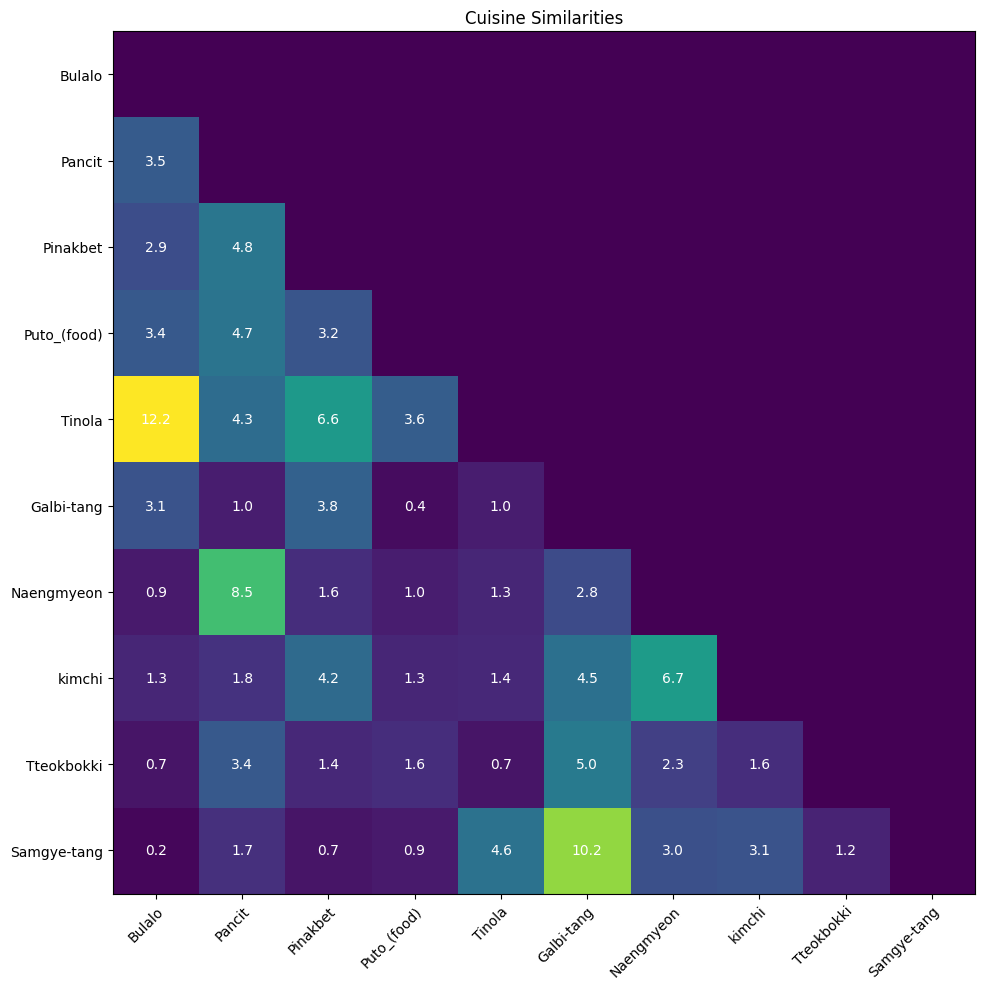

In [14]:

fig, ax = plt.subplots(figsize=sims_heatmap.shape)
im = ax.imshow(sims_heatmap)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(pages)), labels=pages)
ax.set_yticks(np.arange(len(pages)), labels=pages)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(pages)):
    for j in range(len(pages)):
        if i > j:
            text = ax.text(j, i, sims_heatmap[i, j],
                        ha="center", va="center", color="w")

ax.set_title("Cuisine Similarities")
fig.tight_layout()
plt.show()
